# GRIP - THE SPARKS FOUNDATION 
#### DATA SCIENCE AND BUISNESS ANALYTICS INTERNSHIP
### NAME : Aditi Bohra
### TASK 1: Prediction using supervised ML

###### Predict the percentage of an student based on the no.of study hours

In [28]:
# importing libraries
import numpy as np     
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model

In [2]:
#importing dataset
import webbrowser
webbrowser.open("http://bit.ly/w-data")

True

In [3]:
path =  "http://bit.ly/w-data"

In [4]:
# reading data
Data = pd.read_csv(path)

In [5]:
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Checking the relation between Independent and Target Variable

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

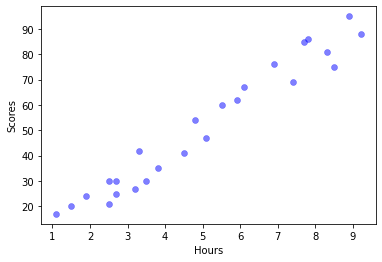

In [34]:
sns.scatterplot(Data.Hours , Data.Scores , alpha = 0.5 , color = "blue" , edgecolor = "blue")

In [10]:
Data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [11]:
hours=Data['Hours']
scores=Data['Scores']

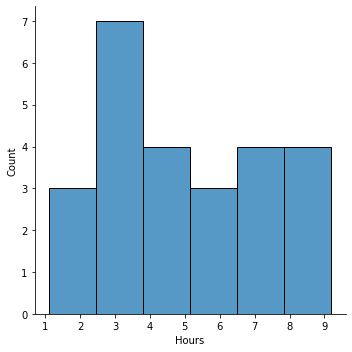

In [12]:
sns.displot(hours)

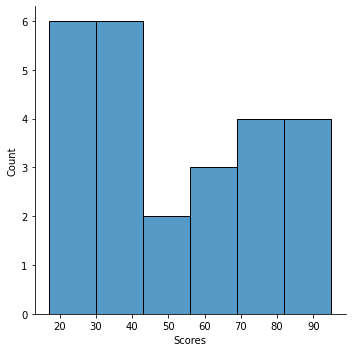

In [13]:
sns.displot(scores)

## Linear regression

In [24]:
from sklearn.model_selection import train_test_split # use to split the dataset into training data and testing data

X_train, X_test, y_train, y_test = train_test_split(Data['Hours'].values.reshape(-1,1), Data['Scores'], test_size = 0.2, random_state = 42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

In [25]:
from sklearn.linear_model import LinearRegression #import model from sklearn

model = LinearRegression()
model.fit(X_train, y_train) #fit the model

LinearRegression()

## Comparing Actual and Predicted Values

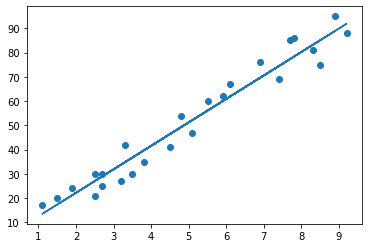

In [29]:
coefficient = model.coef_
intercept = model.intercept_

# Since, y = m*x + c
line = (Data['Hours'].values * coefficient) + intercept

plt.scatter(Data.Hours, Data.Scores)
plt.plot(Data.Hours, line)
plt.show() #plots the regression line

## Comparing Actual and Predicted Values

In [30]:
pred = model.predict(X_test) #get predicted values from model
pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [31]:
pred_compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':pred})
pred_compare 

,Actual Values,Predicted Values
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


## Evaluating the Model

In [32]:
from sklearn import metrics #import metrics from sklearn

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
R2 Score:  0.9678055545167994


## What will be predicted score if a student study for 9.25 hrs in a day?

In [33]:
hours = np.asarray(9.25).reshape(-1,1)
print(f"{model.predict(hours)[0]} will be predicted score if a student study for 9.25 hrs in a day.")

92.38611528261494 will be predicted score if a student study for 9.25 hrs in a day.
